# Car Reviews Sentiment Analysis

# Introduction

In [40]:
#general imports
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os # accessing directory structure

#NLP processing imports
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
nltk.download('averaged_perceptron_tagger')
from stop_words import get_stop_words
import re
import spacy
nltk.download('wordnet')

!pip install vaderSentiment 
from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chenc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chenc\AppData\Roaming\nltk_data...


In [9]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
for dirname, _, filenames in os.walk('Scraped_Car_Review_dodge.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
data = pd.read_csv("Scraped_Car_Review_dodge.csv",engine='python',index_col=False)

In [14]:
data.shape

(11552, 7)

In [15]:
data = data.loc[:10000]

In [16]:
data.shape

(10001, 7)

In [17]:
data.head()

Unnamed: 0                  Review_Date   Author_Name  \
0          0   on 10/13/05 15:30 PM (PDT)     roadking    
1          1   on 07/17/05 21:59 PM (PDT)         Mark    
2          2   on 07/16/02 00:00 AM (PDT)    Tom Sheer    
3          3   on 12/29/07 21:57 PM (PST)  Keven Smith    
4          4   on 02/09/05 18:52 PM (PST)       VanMan    

                                       Vehicle_Title  \
0  2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...   
1  2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...   
2  2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...   
3  2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...   
4  2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...   

                Review_Title  \
0     Great delivery vehicle   
1             Disappointmnet   
2                  Sweet van   
3                Keven Smith   
4  Not what Dodge used to be   

                                              Review  Rating  
0   It's been a great delivery vehicle for my caf...   4.625  
1   Bought this car as a commuter vehicle for a v...   2.125  
2   This van rocks its the best, lots of \rroom. ...   5.000  
3   Great work vehicle. Drives nice. has lots of ...   4.500  
4   Good solid frame and suspension.  Well equipp...   2.875

In [19]:
data.head(10)

Unnamed: 0                  Review_Date  \
0  0                                        on 10/13/05 15:30 PM (PDT)   
1  1                                        on 07/17/05 21:59 PM (PDT)   
2  2                                        on 07/16/02 00:00 AM (PDT)   
3  3                                        on 12/29/07 21:57 PM (PST)   
4  4                                        on 02/09/05 18:52 PM (PST)   
5  5                                        on 05/17/04 00:00 AM (PDT)   
6  6                                        on 08/01/17 16:40 PM (PDT)   
7  7                                        on 02/25/06 06:09 AM (PST)   
8  8                                        on 04/13/04 00:00 AM (PDT)   
9  especially with the 0 % interest. Van   None                          

    Author_Name  \
0  roadking       
1  Mark           
2  Tom Sheer      
3  Keven Smith    
4  VanMan         
5  driverage      
6  Guy            
7  smithtp        
8  Regency        
9  None           

                                                   Vehicle_Title  \
0  2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)            
1  2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2L 8cyl 4A)        
2  2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van (5.2L 8cyl 4A)   
3  2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van (5.2L 8cyl 4A)   
4  2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)            
5  2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)            
6  2003 Dodge Ram Cargo Van 2500 3dr Ext Van (5.2L 8cyl 4A)        
7  2003 Dodge Ram Cargo Van 1500 3dr Ext Van (3.9L 6cyl 3A)        
8  2003 Dodge Ram Cargo Van 1500 3dr Ext Van (3.9L 6cyl 3A)        
9  None                                                            

                        Review_Title  \
0  Great delivery vehicle              
1  Disappointmnet                      
2  Sweet van                           
3  Keven Smith                         
4  Not what Dodge used to be           
5  2001 dodge 1500 ram van             
6  Failur is lurking in every corner   
7  Great Van                           
8  2003 Conversion Van                 
9  None                                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Review  \
0   It's been a great delivery vehicle for my cafe business good power, economy match easily taken care of. Havent repaired anything or replaced anything but tires and normal maintenance items. Upgraded tires to Michelin LX series helped fuel economy. Would buy another in a second                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [20]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10001 rows and 7 columns


In [21]:

data.dtypes

Unnamed: 0       object 
Review_Date      object 
Author_Name      object 
Vehicle_Title    object 
Review_Title     object 
Review           object 
Rating           float64
dtype: object

In [22]:
data["Review"] = data["Review"].astype(str)

# Manish

# TEXT CLEANING

### Removing urls,@mention, https

In [26]:
def remove_urls(Review):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', Review)

In [28]:
data["textclean"] = data["Review"].apply(lambda Review: remove_urls(Review))

In [29]:
data.head()

Unnamed: 0                  Review_Date   Author_Name  \
0  0           on 10/13/05 15:30 PM (PDT)  roadking       
1  1           on 07/17/05 21:59 PM (PDT)  Mark           
2  2           on 07/16/02 00:00 AM (PDT)  Tom Sheer      
3  3           on 12/29/07 21:57 PM (PST)  Keven Smith    
4  4           on 02/09/05 18:52 PM (PST)  VanMan         

                                                   Vehicle_Title  \
0  2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)            
1  2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2L 8cyl 4A)        
2  2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van (5.2L 8cyl 4A)   
3  2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van (5.2L 8cyl 4A)   
4  2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)            

                Review_Title  \
0  Great delivery vehicle      
1  Disappointmnet              
2  Sweet van                   
3  Keven Smith                 
4  Not what Dodge used to be   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Review  \
0   It's been a great delivery vehicle for my cafe business good power, economy match easily taken care of. Havent repaired anything or replaced anything but tires and normal maintenance items. Upgraded tires to Michelin LX series helped fuel economy. Would buy another in a second                                                                                                                                                                                                                                                                                                                                                                                                                                          
1   Bought this car as a commuter vehicle for a van pool.  I was very disappointed in the vehicle in comparison to a 1997 model I had previously.  The motor was sluggish and tended to have a rough idle.  The A/C was better than the old van, but still lacked a separate control for the front and back.  What I was most disappointed with was that in moving up five years, I lost driver room, the ability to adjust the steering wheel to where I like it, and the passenger seats, by all accounts were less comfortable.  What I noticed in driving is that the vehicle had a very large turning radius.  Very difficult to maneuver in traffic.                                                                         
2   This van rocks its the best, lots of \rroom. I carry a lot of cargo in mine \rand i tow a lot too, it works great!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3   Great work vehicle. Drives nice. has lots of room. Easy to handle, bucket seats electric windows                                                                                                                 

# Tokenization

In [60]:
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
print(stop_words.extend(nltk_words))

None


In [59]:
word_tokens = word_tokenize(b) # Tokenization
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
print(filtered_sentence)

['great', 'delivery', 'vehicle', 'cafe', 'business', 'good', 'power', 'economy', 'match', 'easily', 'taken', 'care', 'havent', 'repaired', 'anything', 'replaced', 'anything', 'tires', 'normal', 'maintenance', 'items', 'upgraded', 'tires', 'michelin', 'lx', 'series', 'helped', 'fuel', 'economy', 'buy', 'another', 'second', 'bought', 'car', 'commuter', 'vehicle', 'van', 'pool', 'disappointed', 'vehicle', 'comparison', 'model', 'previously', 'motor', 'sluggish', 'tended', 'rough', 'idle', 'c', 'better', 'old', 'van', 'still', 'lacked', 'separate', 'control', 'front', 'back', 'disappointed', 'moving', 'five', 'years', 'lost', 'driver', 'room', 'ability', 'adjust', 'steering', 'wheel', 'like', 'passenger', 'seats', 'accounts', 'less', 'comfortable', 'noticed', 'driving', 'vehicle', 'large', 'turning', 'radius', 'difficult', 'maneuver', 'traffic', 'van', 'rocks', 'best', 'lots', 'room', 'carry', 'lot', 'cargo', 'mine', 'tow', 'lot', 'works', 'great', 'great', 'work', 'vehicle', 'drives', 'ni

In [61]:
 
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
print(cleaned_data_title)

['great', 'delivery', 'vehicle', 'cafe', 'business', 'good', 'power', 'economy', 'match', 'easily', 'taken', 'care', 'havent', 'repaired', 'anything', 'replaced', 'anything', 'tires', 'normal', 'maintenance', 'items', 'upgraded', 'tires', 'michelin', 'series', 'helped', 'fuel', 'economy', 'buy', 'another', 'second', 'bought', 'car', 'commuter', 'vehicle', 'van', 'pool', 'disappointed', 'vehicle', 'comparison', 'model', 'previously', 'motor', 'sluggish', 'tended', 'rough', 'idle', 'better', 'old', 'van', 'still', 'lacked', 'separate', 'control', 'front', 'back', 'disappointed', 'moving', 'five', 'years', 'lost', 'driver', 'room', 'ability', 'adjust', 'steering', 'wheel', 'like', 'passenger', 'seats', 'accounts', 'less', 'comfortable', 'noticed', 'driving', 'vehicle', 'large', 'turning', 'radius', 'difficult', 'maneuver', 'traffic', 'van', 'rocks', 'best', 'lots', 'room', 'carry', 'lot', 'cargo', 'mine', 'tow', 'lot', 'works', 'great', 'great', 'work', 'vehicle', 'drives', 'nice', 'lots'

# Lemmatization


#### Function to map word with its POS tag

In [36]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

In [62]:
lemmatized_output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_data_title]
lemmatized_output = [word for word in lemmatized_output if not word.isnumeric()]
print(lemmatized_output)

['great', 'delivery', 'vehicle', 'cafe', 'business', 'good', 'power', 'economy', 'match', 'easily', 'take', 'care', 'havent', 'repair', 'anything', 'replace', 'anything', 'tire', 'normal', 'maintenance', 'item', 'upgraded', 'tire', 'michelin', 'series', 'help', 'fuel', 'economy', 'buy', 'another', 'second', 'bought', 'car', 'commuter', 'vehicle', 'van', 'pool', 'disappointed', 'vehicle', 'comparison', 'model', 'previously', 'motor', 'sluggish', 'tend', 'rough', 'idle', 'well', 'old', 'van', 'still', 'lack', 'separate', 'control', 'front', 'back', 'disappointed', 'move', 'five', 'year', 'lose', 'driver', 'room', 'ability', 'adjust', 'steer', 'wheel', 'like', 'passenger', 'seat', 'account', 'less', 'comfortable', 'notice', 'drive', 'vehicle', 'large', 'turn', 'radius', 'difficult', 'maneuver', 'traffic', 'van', 'rock', 'best', 'lot', 'room', 'carry', 'lot', 'cargo', 'mine', 'tow', 'lot', 'work', 'great', 'great', 'work', 'vehicle', 'drive', 'nice', 'lot', 'room', 'easy', 'handle', 'bucke

# Frequency distribution

In [42]:
word_dist = nltk.FreqDist(lemmatized_output)
top100_words = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

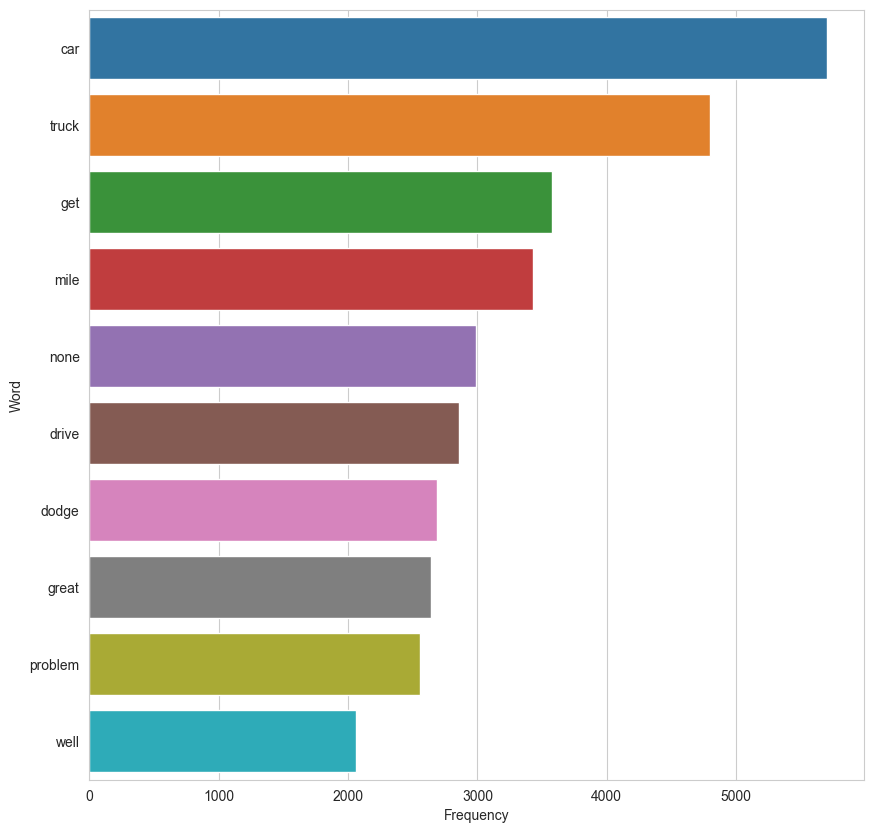

In [43]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

# WordCloud

In [44]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

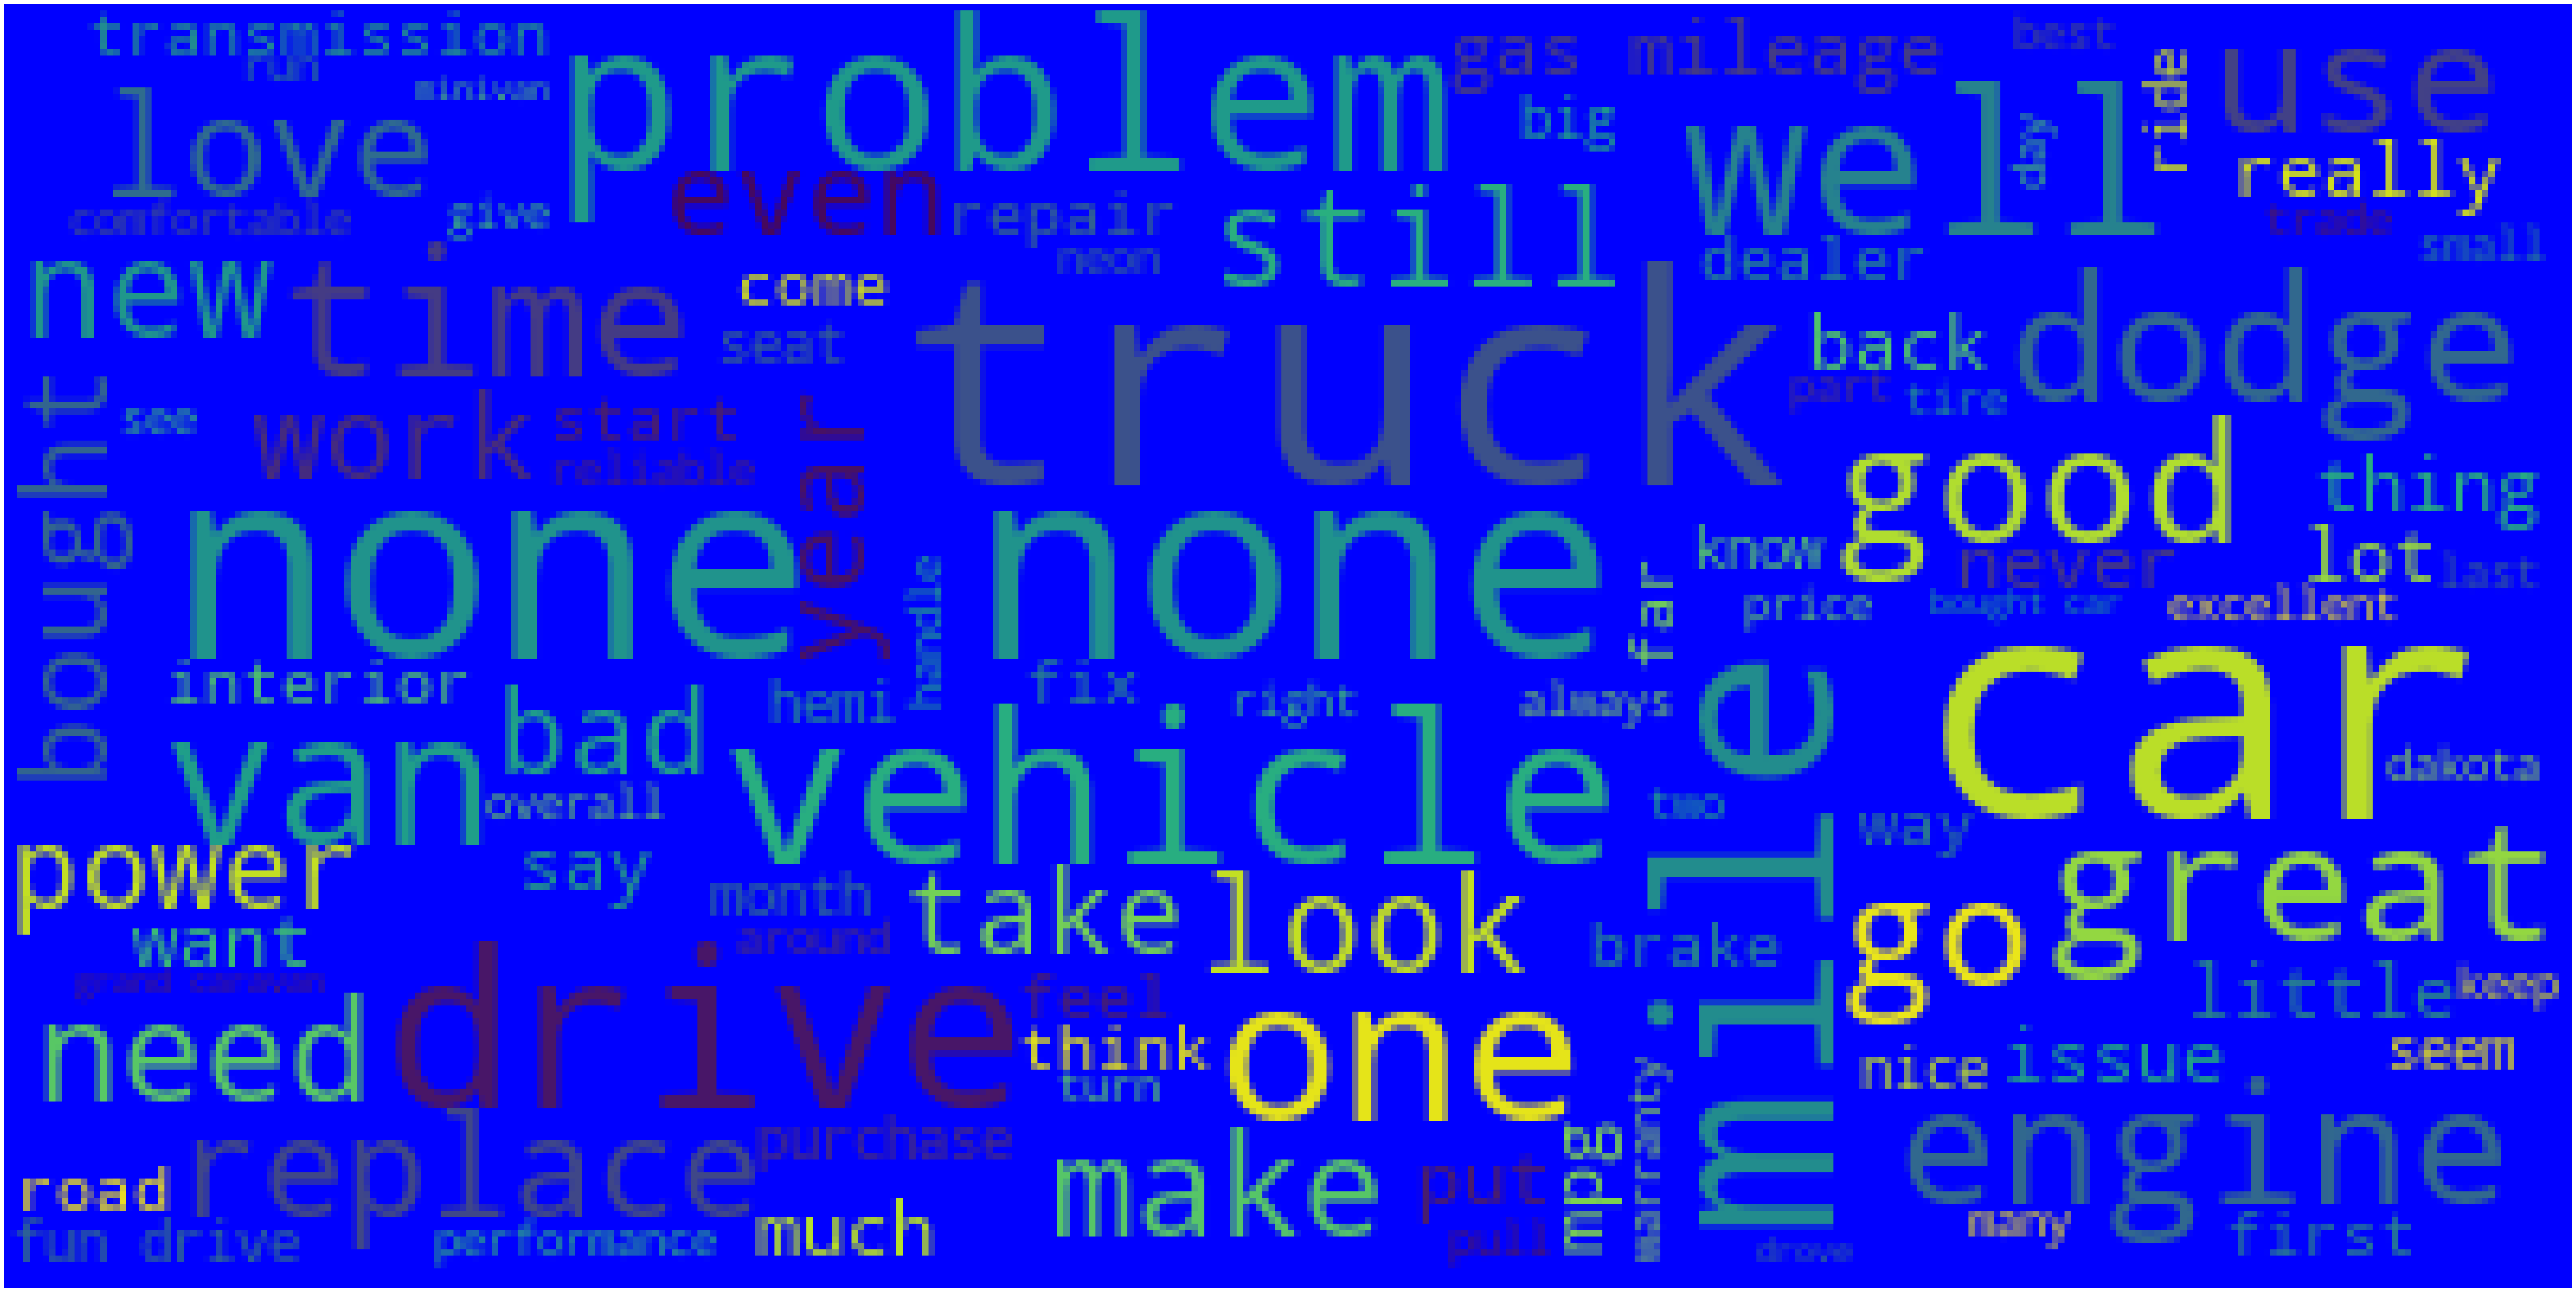

In [46]:
wc(lemmatized_output,'blue','Common Words' )

# sindhu

# VADER 

In [47]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [48]:
data["Polarity"] = data["textclean"].apply(sentiment)

In [49]:
data.head()

Unnamed: 0                  Review_Date   Author_Name  \
0  0           on 10/13/05 15:30 PM (PDT)  roadking       
1  1           on 07/17/05 21:59 PM (PDT)  Mark           
2  2           on 07/16/02 00:00 AM (PDT)  Tom Sheer      
3  3           on 12/29/07 21:57 PM (PST)  Keven Smith    
4  4           on 02/09/05 18:52 PM (PST)  VanMan         

                                                   Vehicle_Title  \
0  2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)            
1  2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2L 8cyl 4A)        
2  2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van (5.2L 8cyl 4A)   
3  2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van (5.2L 8cyl 4A)   
4  2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)            

                Review_Title  \
0  Great delivery vehicle      
1  Disappointmnet              
2  Sweet van                   
3  Keven Smith                 
4  Not what Dodge used to be   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Review  \
0   It's been a great delivery vehicle for my cafe business good power, economy match easily taken care of. Havent repaired anything or replaced anything but tires and normal maintenance items. Upgraded tires to Michelin LX series helped fuel economy. Would buy another in a second                                                                                                                                                                                                                                                                                                                                                                                                                                          
1   Bought this car as a commuter vehicle for a van pool.  I was very disappointed in the vehicle in comparison to a 1997 model I had previously.  The motor was sluggish and tended to have a rough idle.  The A/C was better than the old van, but still lacked a separate control for the front and back.  What I was most disappointed with was that in moving up five years, I lost driver room, the ability to adjust the steering wheel to where I like it, and the passenger seats, by all accounts were less comfortable.  What I noticed in driving is that the vehicle had a very large turning radius.  Very difficult to maneuver in traffic.                                                                         
2   This van rocks its the best, lots of \rroom. I carry a lot of cargo in mine \rand i tow a lot too, it works great!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3   Great work vehicle. Drives nice. has lots of room. Easy to handle, bucket seats electric windows                                                                                                                 

In [50]:
data.dtypes

Unnamed: 0       object 
Review_Date      object 
Author_Name      object 
Vehicle_Title    object 
Review_Title     object 
Review           object 
Rating           float64
textclean        object 
Polarity         float64
dtype: object

In [51]:
def senti(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [52]:
data['Sentiment'] = data.apply(senti, axis=1)

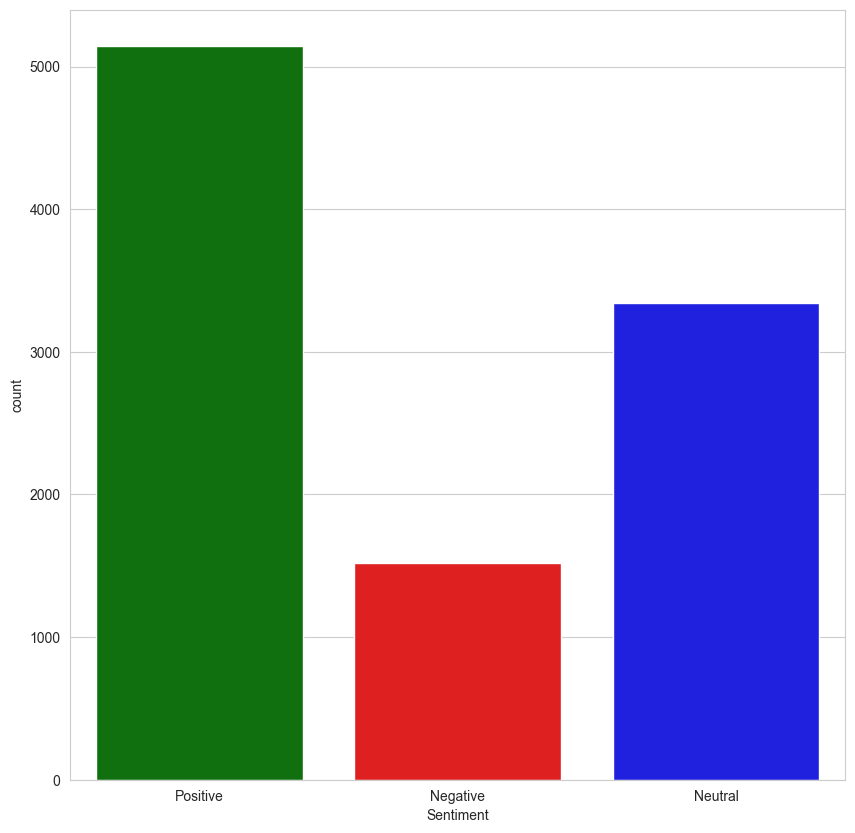

In [53]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment", data=data, 
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

In [54]:
nlp = spacy.load("en_core_web_sm")

In [55]:
def pos(text):
    doc = nlp(text)
    # You want list of Verb tokens 
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [56]:
data["Aspects"] = data["textclean"].apply(pos)

In [57]:
data.head()

Unnamed: 0                  Review_Date   Author_Name  \
0  0           on 10/13/05 15:30 PM (PDT)  roadking       
1  1           on 07/17/05 21:59 PM (PDT)  Mark           
2  2           on 07/16/02 00:00 AM (PDT)  Tom Sheer      
3  3           on 12/29/07 21:57 PM (PST)  Keven Smith    
4  4           on 02/09/05 18:52 PM (PST)  VanMan         

                                                   Vehicle_Title  \
0  2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)            
1  2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2L 8cyl 4A)        
2  2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van (5.2L 8cyl 4A)   
3  2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van (5.2L 8cyl 4A)   
4  2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A)            

                Review_Title  \
0  Great delivery vehicle      
1  Disappointmnet              
2  Sweet van                   
3  Keven Smith                 
4  Not what Dodge used to be   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Review  \
0   It's been a great delivery vehicle for my cafe business good power, economy match easily taken care of. Havent repaired anything or replaced anything but tires and normal maintenance items. Upgraded tires to Michelin LX series helped fuel economy. Would buy another in a second                                                                                                                                                                                                                                                                                                                                                                                                                                          
1   Bought this car as a commuter vehicle for a van pool.  I was very disappointed in the vehicle in comparison to a 1997 model I had previously.  The motor was sluggish and tended to have a rough idle.  The A/C was better than the old van, but still lacked a separate control for the front and back.  What I was most disappointed with was that in moving up five years, I lost driver room, the ability to adjust the steering wheel to where I like it, and the passenger seats, by all accounts were less comfortable.  What I noticed in driving is that the vehicle had a very large turning radius.  Very difficult to maneuver in traffic.                                                                         
2   This van rocks its the best, lots of \rroom. I carry a lot of cargo in mine \rand i tow a lot too, it works great!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3   Great work vehicle. Drives nice. has lots of room. Easy to handle, bucket seats electric windows                                                                                                                 